#**Data Mining Project**

Name: Usman Iqbal

This project follows the CRISP-DM pipeline, which is an iterative methodology. The stages are as follow Explanatory Data Analysis, Data preprossesing, Modelling, Testing, Hyperparameter tuning, Evalutation.

The programming language used is Python as well as Python Data Science libraries including Numpy, Pandas, Matplotlib and SciKit Learn.

This project was developed using Google Colab.

Every attempt was made to make the process as reproducable as possible.

# **Explanatory Data Analysis**

Importing packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GroupShuffleSplit
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import balanced_accuracy_score, classification_report
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


1) Importing the file into the notebook as a dataframe

In [2]:
path = "df_reduced.csv"
df = pd.read_csv(path ,sep=';')

# shows the rows (observations), columns (varibales) and provides the total of the diffetent types of variable types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12402 entries, 0 to 12401
Columns: 300 entries, Info_PepID to feat_esm1b_289
dtypes: float64(290), int64(4), object(6)
memory usage: 28.4+ MB


2) Checking the missing values in the columns and the total number of missing values

In [3]:
print(end = "\n \n \n")
# shows the missing data across the columns
missing_values = df.isnull()
print(missing_values.sum())

print(end = "\n \n \n")

# shows the total number of missing values in the entire dataset
df.isnull().sum().sum()



 
 
Info_PepID           0
Info_organism_id     0
Info_protein_id      0
Info_pos             0
Info_AA              0
                    ..
feat_esm1b_285      13
feat_esm1b_286      14
feat_esm1b_287      11
feat_esm1b_288      13
feat_esm1b_289      14
Length: 300, dtype: int64

 
 


14993

3) Removing the Info variables (as they have no predictive value) and printing out a feature summary of the reamining values

In [4]:
# Identify and separate the feature variables
info_variables = ['Info_PepID','Info_organism_id', 'Info_protein_id', 'Info_pos', 'Info_AA', 'Info_epitope_id', 'Info_nPos', 'Info_nNeg']  # Add the names of informational variables
df = df.drop(info_variables, axis=1)
feature_variables = df

# Perform exploratory analysis on feature variables
# For example, you can use describe() to get summary statistics
feature_summary = feature_variables.describe()

# Display the summary statistics
print("Summary statistics for feature variables:")
print(feature_summary)


Summary statistics for feature variables:
       Info_cluster         Class  feat_esm1b_0  feat_esm1b_1  feat_esm1b_2  \
count  12402.000000  12402.000000  12388.000000  12388.000000  12390.000000   
mean     139.667634     -0.970005      0.040924      0.150334      0.068379   
std       77.944928      0.243095      0.194674      0.180886      0.206083   
min        7.000000     -1.000000     -0.739531     -0.664717     -0.918128   
25%       70.000000     -1.000000     -0.084004      0.040529     -0.065351   
50%      145.000000     -1.000000      0.034410      0.145975      0.069221   
75%      205.000000     -1.000000      0.160128      0.255262      0.203641   
max      283.000000      1.000000      0.925082      1.203393      0.974194   

       feat_esm1b_3  feat_esm1b_4  feat_esm1b_5  feat_esm1b_6  feat_esm1b_7  \
count  12389.000000  12390.000000  12388.000000  12388.000000  12390.000000   
mean       0.077347      0.023808     -0.136817     -0.094994     -0.008023   
std      

4) Visualising the missing values per column and per row

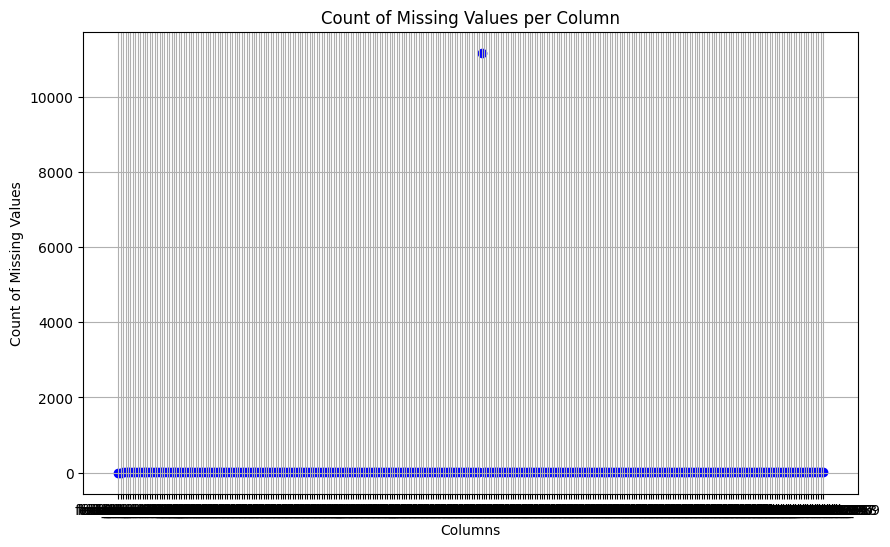

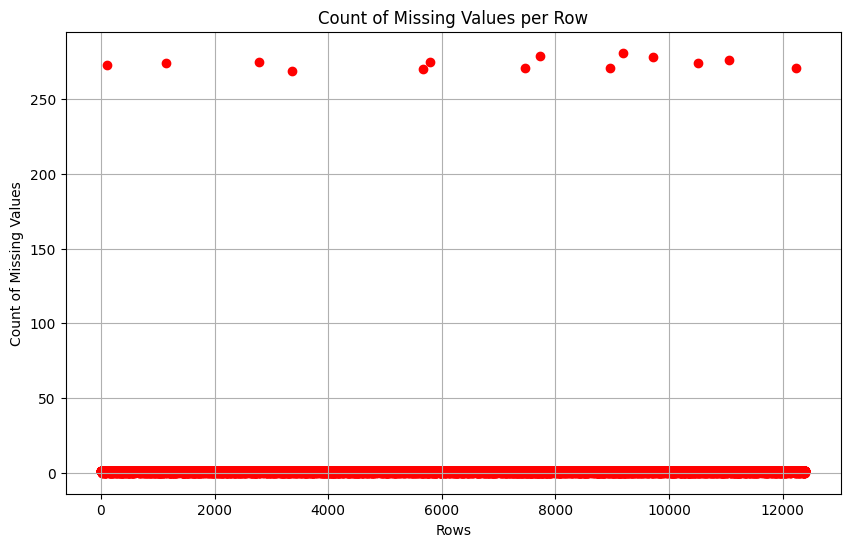

In [5]:
#####Plots the counts of the missing values per column######
# Check for missing values
missing_values = df.isnull().sum()

# Plot the count of missing values per column on a scatter plot
plt.figure(figsize=(10, 6)) # the number of inches
plt.scatter(missing_values.index, missing_values.values, color='blue')
plt.title('Count of Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')
#plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()


# Check for missing values per row
missing_values_per_row = df.isnull().sum(axis=1)

# Plot the count of missing values per row on a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df.index, missing_values_per_row, color='red')
plt.title('Count of Missing Values per Row')
plt.xlabel('Rows')
plt.ylabel('Count of Missing Values')
plt.grid(True)
plt.show()



5) Visualising the Scale of the Features (by looking at the difference between the minimum and maximum values) using a range of different plots

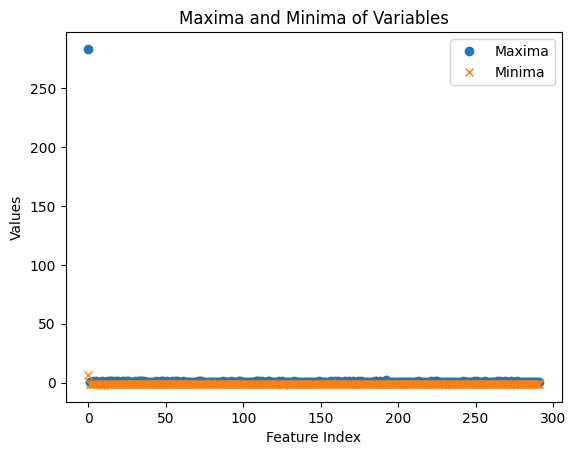

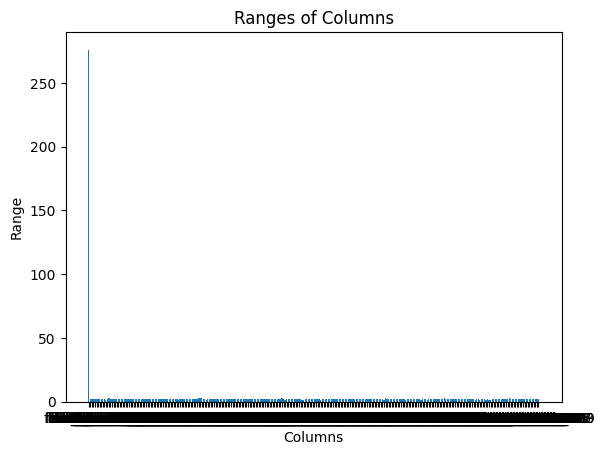

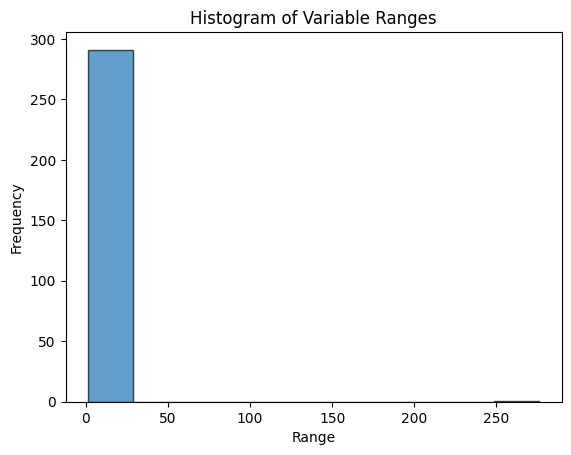

In [6]:
########Scales#########
# Calculate maxima and minima
maxima = feature_variables.max()
minima = feature_variables.min()

# Convert maxima and minima to vectors
maxima_vector = maxima.values
minima_vector = minima.values

# Plot maxima and minima vectors
plt.plot(maxima_vector, label='Maxima', marker='o', linestyle = "none")
plt.plot(minima_vector, label='Minima', marker='x', linestyle = "none")

# Add labels and legend
plt.xlabel('Feature Index')
plt.ylabel('Values')
plt.title('Maxima and Minima of Variables')
plt.legend()

# Show plot
plt.show()


###### BoxPlots#####

# Calculate ranges for each variable
ranges = feature_variables.max() - feature_variables.min()

########BAR PLOT#######

plt.figure()
plt.bar(ranges.index, ranges.values)
plt.xlabel('Columns')
plt.ylabel('Range')
plt.title('Ranges of Columns')



# Plot histogram of ranges
plt.figure()
plt.hist(ranges, edgecolor='black', alpha=0.7)
plt.xlabel('Range')
plt.ylabel('Frequency')
plt.title('Histogram of Variable Ranges')

# Show plot
plt.show()


6) checking the total class balance (whilst acknowledging the "Info_cluster" grouping structure) and visualing the distribution of class balance

Overall Class Balance:
Class
-1    0.985002
 1    0.014998
Name: proportion, dtype: float64





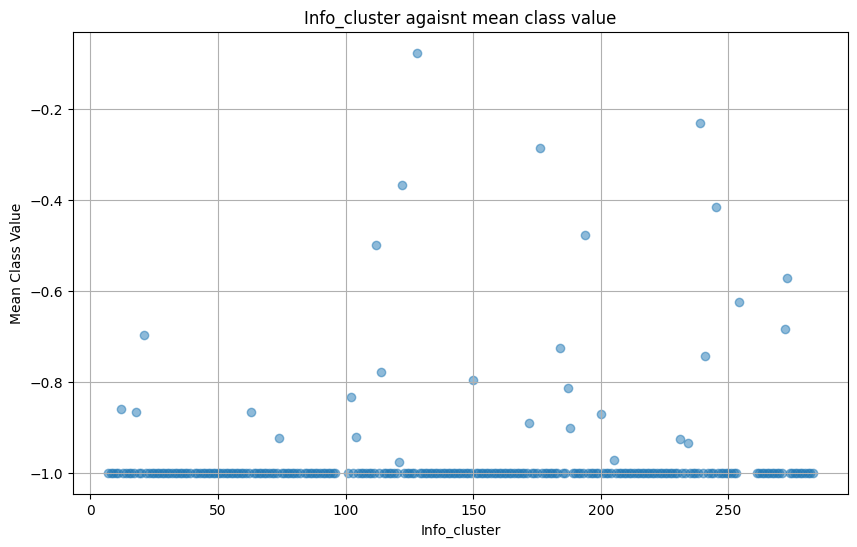

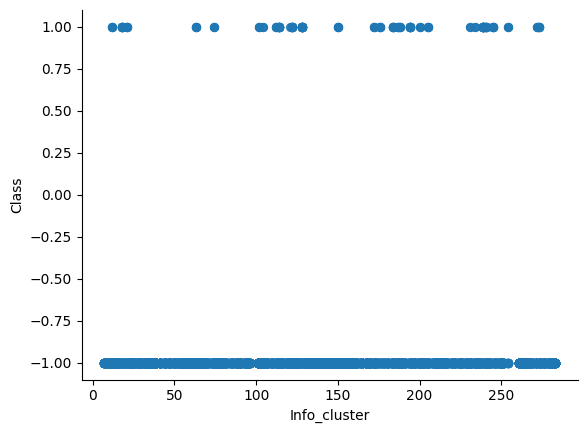

In [7]:
###### class balance under cluster #########

#Overall class balance proportions#
class_balance = df['Class'].value_counts(normalize=True) # normalising shows the proportions relative to the total

print("Overall Class Balance:")
print(class_balance)

print(end = "\n\n\n")

#####Grpah to show the mean class value agaisnt the Grouped Info cluster variable#####

# Group data by 'Info_cluster' and calculate mean class value
mean_class_per_cluster = df.groupby('Info_cluster')['Class'].mean().reset_index()

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(mean_class_per_cluster['Info_cluster'], mean_class_per_cluster['Class'], alpha=0.5)
plt.title('Info_cluster agaisnt mean class value')
plt.xlabel('Info_cluster')
plt.ylabel('Mean Class Value')
plt.grid(True)
plt.show()

df.plot(kind='scatter', x='Info_cluster', y='Class', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

#--- Shows the vast majority of the class varibale is -1

## EDA Summary

*   Most of the dataset is numerical (float64(290), int64(4), object(6))
*   It is a high dimensional dataset intially with 300 features
*   There are a total of 14993 missing values in the dataset (a single column had over 10,000 missing values and 14 rows have over 250 missing values)
*   1 column has a massive differece in scaling
*   It is a highly imbalanced dataset - rougly 98% of all classes are "-1"




# **Data Pre-processing**

Checking missing Values again

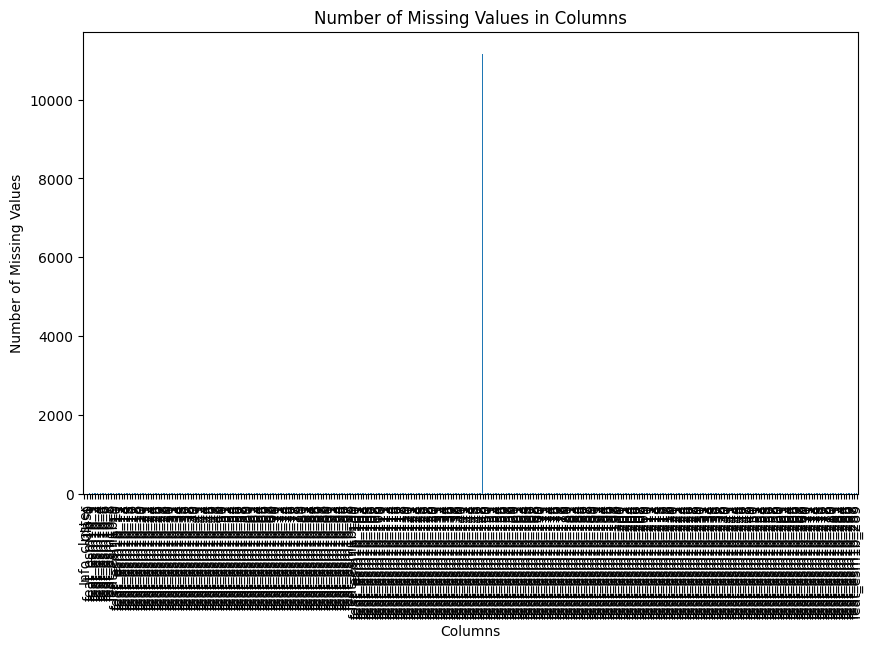

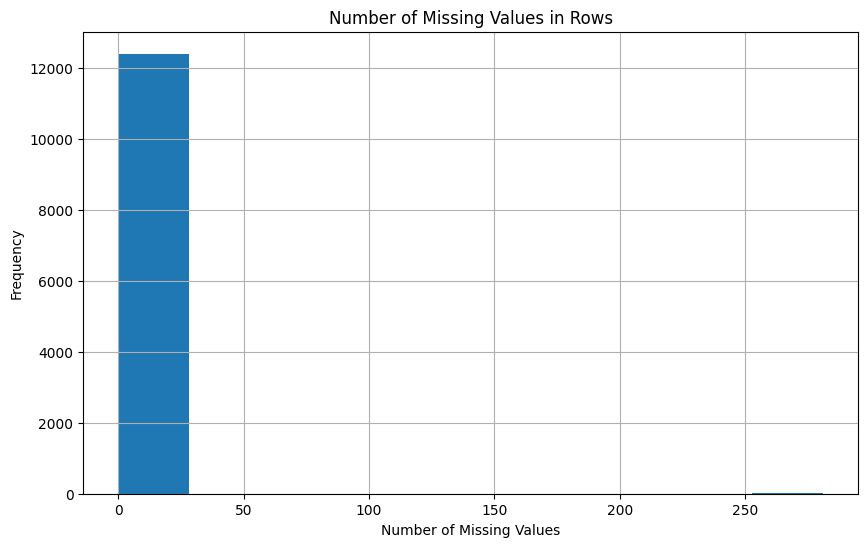

In [8]:
# Number of missing values in columns
missing_values_columns = df.isnull().sum()

# Plot missing values in columns
plt.figure(figsize=(10, 6))
missing_values_columns.plot(kind='bar')
plt.title('Number of Missing Values in Columns')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90)
plt.show()

#--- this shows that column 'feat_esm1b_148' has over 10,000 missing values and should be removed

# Number of missing values in rows
missing_values_rows = df.isnull().sum(axis=1)

# Plot missing values in rows
plt.figure(figsize=(10, 6))
missing_values_rows.plot(kind='hist')
plt.title('Number of Missing Values in Rows')
plt.xlabel('Number of Missing Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Dealing with Missing Values by removing columns and rows with missing values

In [9]:
# Define thresholds for the percentage of missing values in columns and rows
threshold_column = 0.5
threshold_row = 0.5

# Calculate the percentage of missing values in each column and row
missing_percentage_column = df.isnull().mean()
missing_percentage_row = df.isnull().mean(axis=1)

# Get the list of columns and rows to drop
columns_to_drop = missing_percentage_column[missing_percentage_column > threshold_column].index.tolist()
rows_to_drop = missing_percentage_row[missing_percentage_row > threshold_row].index.tolist()

# Remove columns and rows with mostly missing values from the dataset
cleaned_df = df.drop(columns=columns_to_drop, index=rows_to_drop)

print("\n\n\n")
# Print the list of columns and rows dropped
print("Columns dropped:", columns_to_drop)
print("Rows dropped:", rows_to_drop)
print("\n\n\n")






Columns dropped: ['feat_esm1b_148']
Rows dropped: [100, 1139, 2775, 3371, 5676, 5795, 7473, 7727, 8958, 9192, 9718, 10507, 11048, 12239]






Plot missing values again to determine if missing values are gone

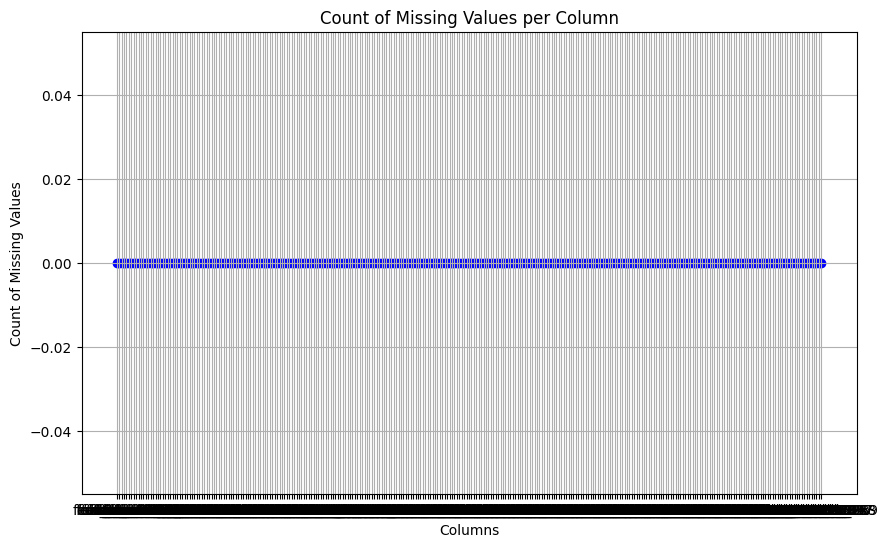

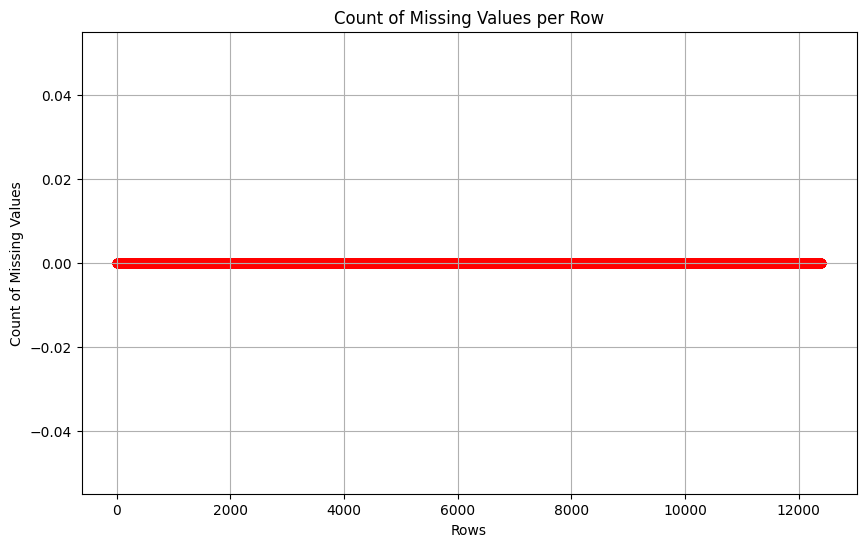

No remaining missing values in the cleaned dataset.






In [10]:
# Plot the count of missing values per column on a scatter plot

missing_values = cleaned_df.isnull().sum()
plt.figure(figsize=(10, 6)) # the number of inches
plt.scatter(missing_values.index, missing_values.values, color='blue')
plt.title('Count of Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')
plt.grid(True)
plt.show()


# Check for missing values per row
missing_values_per_row = cleaned_df.isnull().sum(axis=1)

# Plot the count of missing values per row on a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_df.index, missing_values_per_row, color='red')
plt.title('Count of Missing Values per Row')
plt.xlabel('Rows')
plt.ylabel('Count of Missing Values')
plt.grid(True)
plt.show()


# Check for missing values in the cleaned dataset
remaining_missing_values = cleaned_df.isnull().sum().sum()

if remaining_missing_values == 0:
    print("No remaining missing values in the cleaned dataset.")
else:
    print(f"There are {remaining_missing_values} remaining missing values in the cleaned dataset.")

print("\n\n\n")


# set the df to cleaned df
df = cleaned_df


Split the Data using GroupShuffleSplit (taking "Info_cluster" grouping structure into consideration)

In [11]:

# Extract the 'Info_cluster' variable
info_cluster = df['Info_cluster']

# Initialize GroupShuffleSplit with the desired parameters
group_splitter = GroupShuffleSplit(n_splits=1, train_size=0.75, random_state=50)

# Split the dataset
for train_index, eval_index in group_splitter.split(df, groups=info_cluster):
    training_data = df.iloc[train_index]
    evaluation_data = df.iloc[eval_index]


# Calculate class balance in the original data
class_balance_original = df['Class'].value_counts(normalize=True)

# Calculate class balance in the training data
class_balance_train = training_data['Class'].value_counts(normalize=True)

# Calculate class balance in the evaluation data
class_balance_eval = evaluation_data['Class'].value_counts(normalize=True)

# Print the class balance
print("Class balance in original data:")
print(class_balance_original)
print("\nClass balance in training data:")
print(class_balance_train)
print("\nClass balance in evaluation data:")
print(class_balance_eval)

Class balance in original data:
Class
-1    0.985066
 1    0.014934
Name: proportion, dtype: float64

Class balance in training data:
Class
-1    0.98591
 1    0.01409
Name: proportion, dtype: float64

Class balance in evaluation data:
Class
-1    0.981768
 1    0.018232
Name: proportion, dtype: float64


Using Isolation Forest to identify outliers

In [12]:
# Initialise Isolation Forest model (unspecified contamination)
isolation_forest = IsolationForest(random_state=42)

# Fit the model to the data and predict outliers
outlier_preds = isolation_forest.fit_predict(training_data)

# Identify outliers (outlier_preds == -1 indicates outliers)
outliers = training_data[outlier_preds == -1]

#--- this method identified [462 rows x 291 columns]

# Initialize counters for outliers and inliers
outlier_count = 0
inlier_count = 0

# Loop through the outlier predictions
for pred in outlier_preds:
    if pred == -1:
        outlier_count += 1
    elif pred == 1:
        inlier_count += 1

# Print the counts
print("Number of Intial Outliers and Inliers using Isolation Forest")
print("Number of outliers (-1):", outlier_count)
print("Number of inliers (1):", inlier_count)

Number of Intial Outliers and Inliers using Isolation Forest
Number of outliers (-1): 462
Number of inliers (1): 9403


Using Quantile capping on the Outliers identified

In [13]:
# Identify the rows that contain outliers based on the 'outliers' DataFrame
outlier_indices = outliers[outliers == -1].index

# Calculate the 5th and 95th percentiles for each column in the identified outlier rows
outlier_data = training_data.loc[outlier_indices]
percentiles_lower= outlier_data.quantile(0.05)
percentiles_upper = outlier_data.quantile(0.95)

# Apply quantile capping to the identified outlier rows
for column in outliers.columns:
    training_data.loc[outlier_indices, column] = training_data.loc[outlier_indices, column].clip(upper=percentiles_upper[column])

Retrying Isolation Forest after using Qunatile Capping

In [14]:
# Initialise Isolation Forest model
isolation_forest = IsolationForest(random_state=42)

# Fit the model to the data and predict outliers
outlier_preds = isolation_forest.fit_predict(training_data)

# Identify outliers (outlier_preds == -1 indicates outliers)
outliers = training_data[outlier_preds == -1]

print("\n\n\n")
### count inliers and outliers again
outlier_count = 0
inlier_count = 0
for pred in outlier_preds:
    if pred == -1:
        outlier_count += 1
    elif pred == 1:
        inlier_count += 1
print("Number of detected Outliers and Inliners, using Isolation Forest, after Quantile Capping")
print("Number of outliers (-1):", outlier_count)
print("Number of inliers (1):", inlier_count)






Number of detected Outliers and Inliners, using Isolation Forest, after Quantile Capping
Number of outliers (-1): 445
Number of inliers (1): 9420


Normalisation - scaling the data

In [15]:
# Print the minimum and maximum values for each feature before scaling
print("Minimum and Maximum values for each feature before scaling:")
print(training_data.agg(['min', 'max']))

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Specify columns to scale (exclude 'Class' and 'Info_cluster')
columns_to_scale = training_data.columns.drop(['Class', 'Info_cluster'])

# Fit scaler to the selected columns and transform them
training_data[columns_to_scale] = scaler.fit_transform(training_data[columns_to_scale])

# Print the minimum and maximum values for each feature after scaling
print("\nMinimum and Maximum values for each feature after scaling:")
print(training_data.agg(['min', 'max']))

# Check for missing values in the 'Class' and 'Info_cluster' columns after scaling
missing_values_after_scaling = training_data[['Class', 'Info_cluster']].isnull().sum()
print("\nMissing values in the 'Class' and 'Info_cluster' columns after scaling:")
print(missing_values_after_scaling)

Minimum and Maximum values for each feature before scaling:
     Info_cluster  Class  feat_esm1b_0  feat_esm1b_1  feat_esm1b_2  \
min             7     -1     -0.739531     -0.664717     -0.878746   
max           283      1      0.784410      1.051745      0.974194   

     feat_esm1b_3  feat_esm1b_4  feat_esm1b_5  feat_esm1b_6  feat_esm1b_7  \
min     -0.931084     -1.010501     -1.086608     -1.499195     -0.957883   
max      0.824154      0.709081      0.838205      0.582508      1.052097   

     ...  feat_esm1b_280  feat_esm1b_281  feat_esm1b_282  feat_esm1b_283  \
min  ...       -1.035132       -0.987730       -0.898706       -1.284584   
max  ...        0.772923        0.966091        0.707259        0.908633   

     feat_esm1b_284  feat_esm1b_285  feat_esm1b_286  feat_esm1b_287  \
min       -1.076593       -0.707514       -1.043452       -0.935589   
max        0.707677        0.958485        0.898551        0.708880   

     feat_esm1b_288  feat_esm1b_289  
min       -0.860

<ipython-input-15-cf8c8647b952>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data[columns_to_scale] = scaler.fit_transform(training_data[columns_to_scale])



Minimum and Maximum values for each feature after scaling:
     Info_cluster  Class  feat_esm1b_0  feat_esm1b_1  feat_esm1b_2  \
min             7     -1           0.0           0.0           0.0   
max           283      1           1.0           1.0           1.0   

     feat_esm1b_3  feat_esm1b_4  feat_esm1b_5  feat_esm1b_6  feat_esm1b_7  \
min           0.0           0.0           0.0           0.0           0.0   
max           1.0           1.0           1.0           1.0           1.0   

     ...  feat_esm1b_280  feat_esm1b_281  feat_esm1b_282  feat_esm1b_283  \
min  ...             0.0             0.0             0.0             0.0   
max  ...             1.0             1.0             1.0             1.0   

     feat_esm1b_284  feat_esm1b_285  feat_esm1b_286  feat_esm1b_287  \
min             0.0             0.0             0.0             0.0   
max             1.0             1.0             1.0             1.0   

     feat_esm1b_288  feat_esm1b_289  
min             

Feature Reduction - this step uses Information gain to Identify the top 10 features

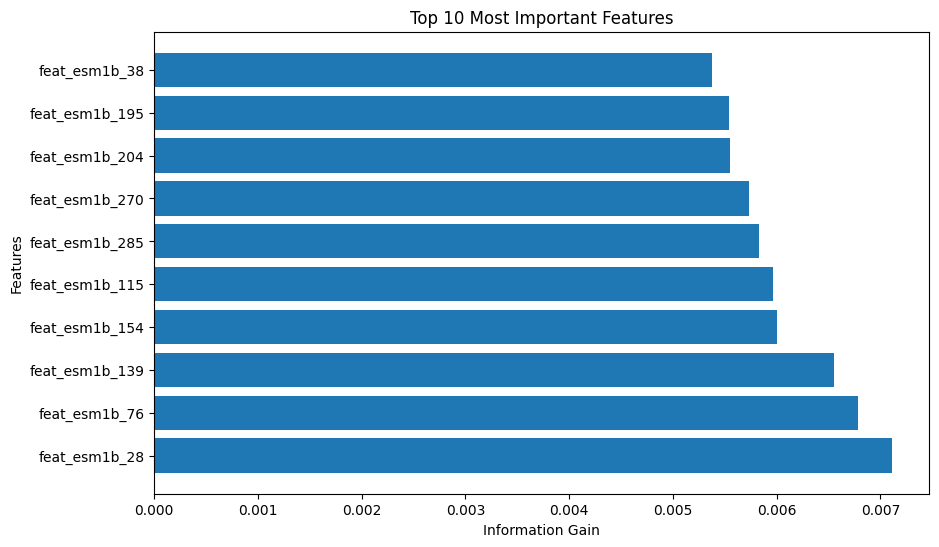

In [16]:
# Define your feature matrix (X) and target variable (y)
X = training_data.drop(columns=['Class', 'Info_cluster'])  # Features
y = training_data['Class']  # Target variable

# Instantiate the SelectKBest feature selection method
selector = SelectKBest(score_func=mutual_info_classif, k=10)  # Select top 10 features

# Fit the selector to the data
selector.fit(X, y)

# Get the scores of the features
scores = selector.scores_

# Get the indices of the top 10 features
top_indices = scores.argsort()[-10:][::-1]

# Get the names of the top 10 features
top_features = X.columns[top_indices]

# Plot the scores of the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_features)), scores[top_indices], align='center')
plt.yticks(range(len(top_features)), top_features)
plt.xlabel('Information Gain')
plt.ylabel('Features')
plt.title('Top 10 Most Important Features')
plt.show()

Use a Random Forest to identify the most important features - this is another way and is used here as a validation technique

Most of the feature identifed by Information Gain and the random forest feature importance are similar. This suggest I have a good range of features for feature selection.

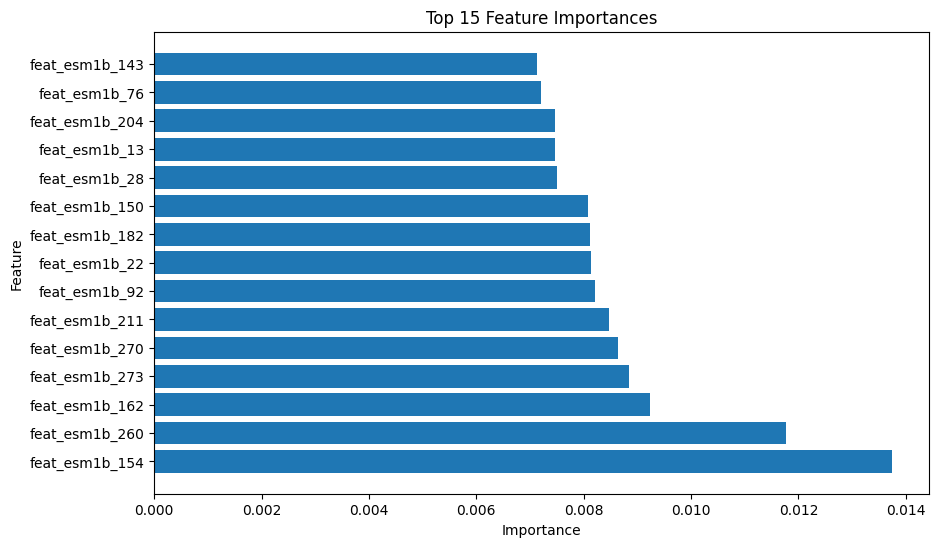

In [19]:
# Define features (X) and target variable (y) for training_subset
X_train = training_data.drop(columns=['Class', 'Info_cluster'])  # Features
y_train = training_data['Class']  # Target variable

# Initialize Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)

# Train the Random Forest Classifier
random_forest.fit(X_train, y_train)

# Get feature importances
feature_importances = random_forest.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort features by importance and select top 15
top_15_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(15)

# Visualize top 15 feature importances
plt.figure(figsize=(10, 6))
plt.barh(top_15_features['Feature'], top_15_features['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 15 Feature Importances')
plt.show()

## Steps involved in Data Pre-processing

1) Remove columns and rows that have majority missing values

2) Split data into training and evaluation subsets (taking "Info_cluster" into consideration)

3)Use Isolation forest to determine the outliers and then use quantile capping to cap at the 5th and 95th percentile

4) Scale the training data using MinMaxScaler() and check the min-max range before and after scaling to ensure it worked

5) preform feature reduction using Information gain to identify the top 10 most important features






# **Preliminary Modelling**

Splitting the training data further into train_subset and eval_subset

In [20]:
# Shuffle the unique values of Info_cluster
unique_info_clusters = training_data['Info_cluster'].unique()
np.random.shuffle(unique_info_clusters)

# Split the unique values into training and evaluation clusters
train_clusters, eval_clusters = train_test_split(unique_info_clusters, test_size=0.25, random_state=50)

# Filter the training and evaluation subsets based on the selected clusters
train_subset = training_data[training_data['Info_cluster'].isin(train_clusters)]
eval_subset = training_data[training_data['Info_cluster'].isin(eval_clusters)]

# Check the distribution of 'Info_cluster' values in each subset
print("Training Subset Info_cluster Distribution:")
print(train_subset['Info_cluster'].value_counts())
print("\nEvaluation Subset Info_cluster Distribution:")
print(eval_subset['Info_cluster'].value_counts())


Training Subset Info_cluster Distribution:
Info_cluster
205    373
153    206
44     183
168    142
28     130
      ... 
17       8
118      6
108      6
227      5
135      5
Name: count, Length: 148, dtype: int64

Evaluation Subset Info_cluster Distribution:
Info_cluster
154    305
211    196
142    170
18     164
132     95
75      90
119     86
57      79
125     78
63      75
13      73
70      69
62      67
123     60
187     54
37      53
60      50
89      48
229     48
224     39
122     37
222     36
215     36
76      35
73      35
69      33
91      33
52      31
199     30
221     29
274     27
266     26
275     25
124     24
228     24
105     23
130     22
248     21
66      17
219     17
49      15
176     14
206     13
218     13
45       9
182      8
19       7
192      6
159      4
198      3
Name: count, dtype: int64


Creating a preliminary Decision Tree to test performance (before class balancing)

In [21]:
# Define X_train_subset with only the top 10 features
X_train_subset = train_subset[top_features]

# Define y_train_subset
y_train_subset = train_subset['Class']

# Instantiate the DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Fit the decision tree to the training subset data
decision_tree.fit(X_train_subset, y_train_subset)

DecisionTreeClassifier(random_state=42)

sing the eval-subset to check the performance of the preliminary model (before class balancing)

In [22]:
# Define X_eval_subset with only the top 10 features
X_eval = eval_subset[top_features]

# Define y_eval_subset
y_eval = eval_subset['Class']

# Predict the target values for the evaluation subset
y_pred = decision_tree.predict(X_eval)

# Generate classification report as a dictionary
report_dict = classification_report(y_eval, y_pred, output_dict=True)

# Compute balanced accuracy
balancedAccuracy = balanced_accuracy_score(y_eval, y_pred)

# Print overall scores
print("Overall Scores:")
print("Accuracy:", report_dict['accuracy'])
print("Precision:", report_dict['macro avg']['precision'])
print("Recall:", report_dict['macro avg']['recall'])
print("F1-score:", report_dict['macro avg']['f1-score'])
print("Balanced Accuracy:", balancedAccuracy)

#-- the incorrectly high accuracy, low precision, low recall and low F1-score suggests a class imbalance

Overall Scores:
Accuracy: 0.9780564263322884
Precision: 0.5321274133625677
Recall: 0.5246460776526655
F1-score: 0.5277821834522866
Balanced Accuracy: 0.5246460776526655


# **Decision Tree with Class Balancing**

This part looks at Decision tree modelling after performing class balancing.

It will help determine the best Class balancing technique to use.

Using a Decision Tree with different class balancing techniques to find the best best one.

SMOTE was chosen as it has best balanced performance between F1 and balanced accuracy. These metrics are less affected by class imbalance.

Creating a Decison tree after class balancing using Under smapling.

This can then be compared to the preliminary Decision tree to determine if there is any improvement in preformance.

In [23]:
from imblearn.under_sampling import RandomUnderSampler

# Initialize RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)

# Define your feature matrix (X) and target variable (y) for training_subset
X_train_subset_us = train_subset.drop(columns=['Class', 'Info_cluster'])  # Features
y_train_subset_us = train_subset['Class']  # Target variable

# Perform under-sampling
X_resampled_us, y_resampled_us = undersampler.fit_resample(X_train_subset_us, y_train_subset_us)

# Convert back to DataFrame
undersampled_df_us = pd.concat([pd.DataFrame(X_resampled_us, columns=X_train_subset_us.columns), pd.Series(y_resampled_us, name='Class')], axis=1)

# Shuffle the dataset
undersampled_df_us = undersampled_df_us.sample(frac=1, random_state=42).reset_index(drop=True)

########################### Decision Tree using Undersampled data ##########################

# Define X_train_subset with only the top 10 features from the undersampled data
X_train_subset_us = undersampled_df_us[top_features]

# Define y_train_subset from the undersampled data
y_train_subset_us = undersampled_df_us['Class']

# Instantiate the DecisionTreeClassifier
decision_tree_us = DecisionTreeClassifier(random_state=42)

# Fit the decision tree to the training subset data
decision_tree_us.fit(X_train_subset_us, y_train_subset_us)


################################## Checking performance using evaluation_training dataset #####################

# Define X_eval with only the top 10 features from the evaluation_subset
X_eval_us = eval_subset[top_features]

# Define y_eval from the evaluation_subset
y_eval_us = eval_subset['Class']

# Make predictions on the evaluation data using the decision tree model
y_pred_us = decision_tree_us.predict(X_eval_us)


# Generate classification report as a dictionary
report_dict = classification_report(y_eval_us, y_pred_us, output_dict=True)

# Compute balanced accuracy
balancedAccuracy = balanced_accuracy_score(y_eval_us, y_pred_us)

# Print overall scores
print("Overall Scores:")
print("Accuracy:", report_dict['accuracy'])
print("Precision:", report_dict['macro avg']['precision'])
print("Recall:", report_dict['macro avg']['recall'])
print("F1-score:", report_dict['macro avg']['f1-score'])
print("Balanced Accuracy:", balancedAccuracy)

# Count the number of samples in each class
class_counts = undersampled_df_us['Class'].value_counts()

class_counts

Overall Scores:
Accuracy: 0.6986677115987461
Precision: 0.5107365727678116
Recall: 0.6732116992944914
F1-score: 0.4374541181906809
Balanced Accuracy: 0.6732116992944914


Class
-1    92
 1    92
Name: count, dtype: int64

Creating a Decison tree after class balancing using Over smapling.

This can then be compared to the preliminary Decision tree to determine if there is any improvement in preformance.

In [24]:
from imblearn.over_sampling import RandomOverSampler
# Initialize RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Define your feature matrix (X) and target variable (y) for training_subset
X_train_subset_os = train_subset.drop(columns=['Class', 'Info_cluster'])  # Features
y_train_subset_os = train_subset['Class']  # Target variable

# Perform oversampling
X_resampled_os, y_resampled_os = oversampler.fit_resample(X_train_subset_os, y_train_subset_os)

# Convert back to DataFrame
oversampled_df_os = pd.concat([pd.DataFrame(X_resampled_os, columns=X_train_subset_os.columns), pd.Series(y_resampled_os, name='Class')], axis=1)

# Shuffle the dataset
oversampled_df_os = oversampled_df_os.sample(frac=1, random_state=42).reset_index(drop=True)

########################### Decision Tree using Oversampled data ##########################

# Define X_train_subset with only the top 10 features from the oversampled data
X_train_subset_os = oversampled_df_os[top_features]

# Define y_train_subset from the oversampled data
y_train_subset_os = oversampled_df_os['Class']

# Instantiate the DecisionTreeClassifier
decision_tree_os = DecisionTreeClassifier(random_state=42)

# Fit the decision tree to the training subset data
decision_tree_os.fit(X_train_subset_os, y_train_subset_os)


################################## Checking performance using evaluation_training dataset #####################

# Define X_eval with only the top 10 features from the evaluation_subset
X_eval_os = eval_subset[top_features]

# Define y_eval from the evaluation_subset
y_eval_os = eval_subset['Class']

# Make predictions on the evaluation data using the decision tree model
y_pred_os = decision_tree_os.predict(X_eval_os)


# Generate classification report as a dictionary
report_dict = classification_report(y_eval_os, y_pred_os, output_dict=True)

# Compute balanced accuracy
balancedAccuracy = balanced_accuracy_score(y_eval_os, y_pred_os)

# Print overall scores
print("Overall Scores:")
print("Accuracy:", report_dict['accuracy'])
print("Precision:", report_dict['macro avg']['precision'])
print("Recall:", report_dict['macro avg']['recall'])
print("F1-score:", report_dict['macro avg']['f1-score'])
print("Balanced Accuracy:", balancedAccuracy)

# Count the number of samples in each class
class_counts = oversampled_df_os['Class'].value_counts()

class_counts

Overall Scores:
Accuracy: 0.9760971786833855
Precision: 0.5259113766938363
Recall: 0.5236532261832453
F1-score: 0.5247164425175935
Balanced Accuracy: 0.5236532261832453


Class
-1    7221
 1    7221
Name: count, dtype: int64

Creating a Decison tree after class balancing using cost sensitive classification.

This can then be compared to the preliminary Decision tree to determine if there is any improvement in preformance.

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight

# Assume training_subset and eval_subset are already loaded
# Assume top_features is a list containing the names of the top features

# Separate features (X_train) and target variable (y_train) for training subset
X_train = train_subset[top_features]
y_train = train_subset['Class']

# Compute class weights to handle class imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

# Initialize DecisionTreeClassifier with class weights
# You can adjust other hyperparameters as needed
decision_tree = DecisionTreeClassifier(class_weight=dict(zip(np.unique(y_train), class_weights)))

# Fit the decision tree classifier to the training data
decision_tree.fit(X_train, y_train)

# Separate features (X_eval) and target variable (y_eval) for evaluation subset
X_eval = eval_subset[top_features]
y_eval = eval_subset['Class']

# Predict the target values for the evaluation subset
y_pred = decision_tree.predict(X_eval)


# Generate classification report as a dictionary
report_dict = classification_report(y_eval, y_pred, output_dict=True)

# Compute balanced accuracy
balancedAccuracy = balanced_accuracy_score(y_eval, y_pred)

# Print overall scores
print("Overall Scores:")
print("Accuracy:", report_dict['accuracy'])
print("Precision:", report_dict['macro avg']['precision'])
print("Recall:", report_dict['macro avg']['recall'])
print("F1-score:", report_dict['macro avg']['f1-score'])
print("Balanced Accuracy:", balancedAccuracy)


Overall Scores:
Accuracy: 0.9753134796238244
Precision: 0.5239513034272859
Recall: 0.5232560855954772
F1-score: 0.5235970238148151
Balanced Accuracy: 0.5232560855954772


Creating a Decison tree after class balancing using SMOTE.

This can then be compared to the preliminary Decision tree to determine if there is any improvement in preformance between different class balancing techniques.

In [26]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Define your feature matrix (X) and target variable (y) for training_subset
X_train_subset = train_subset.drop(columns=['Class', 'Info_cluster'])  # Features
y_train_subset = train_subset['Class']  # Target variable

# Perform SMOTE over-sampling
X_resampled, y_resampled = smote.fit_resample(X_train_subset, y_train_subset)

# Convert back to DataFrame
oversampled_df = pd.concat([pd.DataFrame(X_resampled, columns=X_train_subset.columns), pd.Series(y_resampled, name='Class')], axis=1)

########################### Decision Tree using Oversampled data ##########################

# Define X_train_subset with only the top 10 features from the oversampled data
X_train_subset = oversampled_df[top_features]

# Define y_train_subset from the oversampled data
y_train_subset = oversampled_df['Class']

# Instantiate the DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Fit the decision tree to the training subset data
decision_tree.fit(X_train_subset, y_train_subset)


################################## Checking performance using evaluation_training dataset #####################

# Define X_eval with only the top 10 features from the evaluation_subset
X_eval = eval_subset[top_features]

# Define y_eval from the evaluation_subset
y_eval = eval_subset['Class']

# Make predictions on the evaluation data using the decision tree model
y_pred = decision_tree.predict(X_eval)


# Generate classification report as a dictionary
report_dict = classification_report(y_eval_os, y_pred_os, output_dict=True)

# Compute balanced accuracy
balancedAccuracy = balanced_accuracy_score(y_eval, y_pred)

# Print overall scores
print("Overall Scores:")
print("Accuracy:", report_dict['accuracy'])
print("Precision:", report_dict['macro avg']['precision'])
print("Recall:", report_dict['macro avg']['recall'])
print("F1-score:", report_dict['macro avg']['f1-score'])
print("Balanced Accuracy:", balancedAccuracy)

Overall Scores:
Accuracy: 0.9760971786833855
Precision: 0.5259113766938363
Recall: 0.5236532261832453
F1-score: 0.5247164425175935
Balanced Accuracy: 0.53201653973742


# **Random Forest Modelling**

This section looks at modelling the Train susbset using a random forest with different class balancing
balancing.

This is done to try and improve the performance of the model.

Random forest are resilent to class imbalance and are non-parametric models so have no presumption of the underlying data structure. This may lead to better performance compared to a decision tree.



In [27]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report, balanced_accuracy_score
import pandas as pd

# Initialize RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)

# Define your feature matrix (X) and target variable (y) for training_subset
X_train_subset = train_subset.drop(columns=['Class', 'Info_cluster'])  # Features
y_train_subset = train_subset['Class']  # Target variable

# Perform undersampling
X_resampled, y_resampled = undersampler.fit_resample(X_train_subset, y_train_subset)

# Convert back to DataFrame
undersampled_df = pd.concat([pd.DataFrame(X_resampled, columns=X_train_subset.columns), pd.Series(y_resampled, name='Class')], axis=1)

########################### New Random Forest using Undersampled data ##########################

# Define X_train_subset with only the top 10 features from the undersampled data
X_train_subset = undersampled_df[top_features]

# Define y_train_subset from the undersampled data
y_train_subset = undersampled_df['Class']

# Instantiate the RandomForestClassifier
random_forest = RandomForestClassifier(random_state=42)

# Fit the random forest to the training subset data
random_forest.fit(X_train_subset, y_train_subset)

################################## Checking performance using evaluation_training dataset #####################

# Define X_eval with only the top 10 features from the evaluation_subset
X_eval = eval_subset[top_features]

# Define y_eval from the evaluation_subset
y_eval = eval_subset['Class']

# Make predictions on the evaluation data using the random forest model
y_pred = random_forest.predict(X_eval)

# Generate classification report as a dictionary
report_dict = classification_report(y_eval, y_pred, output_dict=True)

# Compute balanced accuracy
balancedAccuracy = balanced_accuracy_score(y_eval, y_pred)

# Print overall scores
print("Overall Scores:")
print("Accuracy:", report_dict['accuracy'])
print("Precision:", report_dict['macro avg']['precision'])
print("Recall:", report_dict['macro avg']['recall'])
print("F1-score:", report_dict['macro avg']['f1-score'])
print("Balanced Accuracy:", balancedAccuracy)


Overall Scores:
Accuracy: 0.8405172413793104
Precision: 0.519611319266641
Recall: 0.7015722095033406
F1-score: 0.49901772816175527
Balanced Accuracy: 0.7015722095033406


In [28]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
import pandas as pd

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Define your feature matrix (X) and target variable (y) for training_subset
X_train_subset = train_subset.drop(columns=['Class', 'Info_cluster'])  # Features
y_train_subset = train_subset['Class']  # Target variable

# Perform SMOTE over-sampling
X_resampled, y_resampled = smote.fit_resample(X_train_subset, y_train_subset)

# Convert back to DataFrame
oversampled_df = pd.concat([pd.DataFrame(X_resampled, columns=X_train_subset.columns), pd.Series(y_resampled, name='Class')], axis=1)

# Shuffle the dataset (if necessary)
# oversampled_df = oversampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

########################### New Random Forest using Oversampled data ##########################

# Define X_train_subset with only the top 10 features from the oversampled data
X_train_subset = oversampled_df[top_features]

# Define y_train_subset from the oversampled data
y_train_subset = oversampled_df['Class']

# Instantiate the RandomForestClassifier
random_forest = RandomForestClassifier(random_state=42)

# Fit the random forest to the training subset data
random_forest.fit(X_train_subset, y_train_subset)

################################## Checking performance using evaluation_training dataset #####################

# Define X_eval with only the top 10 features from the evaluation_subset
X_eval = eval_subset[top_features]

# Define y_eval from the evaluation_subset
y_eval = eval_subset['Class']

# Make predictions on the evaluation data using the random forest model
y_pred = random_forest.predict(X_eval)


# Generate classification report as a dictionary
report_dict = classification_report(y_eval_us, y_pred_us, output_dict=True)

# Compute balanced accuracy
balancedAccuracy = balanced_accuracy_score(y_eval_us, y_pred_us)

# Print overall scores
print("Overall Scores:")
print("Accuracy:", report_dict['accuracy'])
print("Precision:", report_dict['macro avg']['precision'])
print("Recall:", report_dict['macro avg']['recall'])
print("F1-score:", report_dict['macro avg']['f1-score'])
print("Balanced Accuracy:", balancedAccuracy)


Overall Scores:
Accuracy: 0.6986677115987461
Precision: 0.5107365727678116
Recall: 0.6732116992944914
F1-score: 0.4374541181906809
Balanced Accuracy: 0.6732116992944914


# **Further Modelling**
This Section looks at other modelling teachniques that can be used for Binary classificaiton.

Models: Support Vector Machine (SVM), Logistic Regression and a Multilayer Perceptron (MLP).

(Note: please change the Runtime to GPU - the use of a hardware accelerator allows for faster training of the Nueral Network)

Support Vector Machine using SMOTE

In [29]:
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
import pandas as pd

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Define your feature matrix (X) and target variable (y) for training_subset
X_train_subset = train_subset.drop(columns=['Class', 'Info_cluster'])  # Features
y_train_subset = train_subset['Class']  # Target variable

# Perform SMOTE over-sampling
X_resampled, y_resampled = smote.fit_resample(X_train_subset, y_train_subset)

# Convert back to DataFrame
oversampled_df = pd.concat([pd.DataFrame(X_resampled, columns=X_train_subset.columns), pd.Series(y_resampled, name='Class')], axis=1)

# Shuffle the dataset (if necessary)
# oversampled_df = oversampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

########################### New SVM using Oversampled data ##########################

# Define X_train_subset with only the top 10 features from the oversampled data
X_train_subset = oversampled_df[top_features]

# Define y_train_subset from the oversampled data
y_train_subset = oversampled_df['Class']

# Instantiate the SVM classifier
svm_classifier = SVC(random_state=42)

# Fit the SVM classifier to the training subset data
svm_classifier.fit(X_train_subset, y_train_subset)

################################## Checking performance using evaluation_training dataset #####################

# Define X_eval with only the top 10 features from the evaluation_subset
X_eval = eval_subset[top_features]

# Define y_eval from the evaluation_subset
y_eval = eval_subset['Class']

# Make predictions on the evaluation data using the SVM classifier
y_pred = svm_classifier.predict(X_eval)

# Generate classification report as a dictionary
report_dict = classification_report(y_eval, y_pred, output_dict=True)

# Compute balanced accuracy
balancedAccuracy = balanced_accuracy_score(y_eval, y_pred)

# Print overall scores
print("Overall Scores:")
print("Accuracy:", report_dict['accuracy'])
print("Precision:", report_dict['macro avg']['precision'])
print("Recall:", report_dict['macro avg']['recall'])
print("F1-score:", report_dict['macro avg']['f1-score'])
print("Balanced Accuracy:", balancedAccuracy)

Overall Scores:
Accuracy: 0.8804858934169278
Precision: 0.506325695137712
Recall: 0.5477386347708265
F1-score: 0.490073145245559
Balanced Accuracy: 0.5477386347708265


MultiLayer Perception (Nueral Network) using SMOTE

For better performance set GPU as Run time accelerator
(In Google Colab - this can be done by clicking on: "Runtime" Tab, then "change runtime type" and selecting "T4 GPU"

In [30]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Define your feature matrix (X) and target variable (y) for training_subset
X_train_subset = train_subset.drop(columns=['Class', 'Info_cluster'])  # Features
y_train_subset = train_subset['Class']  # Target variable

# Perform oversampling
X_resampled, y_resampled = oversampler.fit_resample(X_train_subset, y_train_subset)

# Convert back to DataFrame
oversampled_df = pd.concat([pd.DataFrame(X_resampled, columns=X_train_subset.columns), pd.Series(y_resampled, name='Class')], axis=1)

# Shuffle the dataset
oversampled_df = oversampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

########################### Neural Network using Oversampled data ##########################

# Define X_train_subset with only the top 10 features from the oversampled data
X_train_subset = oversampled_df[top_features]

# Define y_train_subset from the oversampled data
y_train_subset = oversampled_df['Class']

# Instantiate the MLPClassifier (Neural Network)
neural_network = MLPClassifier(hidden_layer_sizes=(100,),  # One hidden layer with 100 neurons
                               activation='relu',  # Activation function
                               solver='adam',  # Optimization algorithm
                               alpha=0.0001,  # L2 regularization parameter
                               batch_size='auto',  # Number of samples per batch
                               learning_rate='constant',  # Learning rate schedule
                               learning_rate_init=0.001,  # Initial learning rate
                               max_iter=1000,  # Maximum number of iterations
                               random_state=42)


# Fit the neural network to the training subset data
neural_network.fit(X_train_subset, y_train_subset)


################################## Checking performance using evaluation_training dataset #####################

# Define X_eval with only the top 10 features from the evaluation_subset
X_eval = eval_subset[top_features]

# Define y_eval from the evaluation_subset
y_eval = eval_subset['Class']

# Make predictions on the evaluation data using the neural network model
y_pred = neural_network.predict(X_eval)

# Generate classification report as a dictionary
report_dict = classification_report(y_eval_us, y_pred_us, output_dict=True)

# Compute balanced accuracy
balancedAccuracy = balanced_accuracy_score(y_eval_us, y_pred_us)

# Print overall scores
print("Overall Scores:")
print("Accuracy:", report_dict['accuracy'])
print("Precision:", report_dict['macro avg']['precision'])
print("Recall:", report_dict['macro avg']['recall'])
print("F1-score:", report_dict['macro avg']['f1-score'])
print("Balanced Accuracy:", balancedAccuracy)

Overall Scores:
Accuracy: 0.6986677115987461
Precision: 0.5107365727678116
Recall: 0.6732116992944914
F1-score: 0.4374541181906809
Balanced Accuracy: 0.6732116992944914


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Logistic Regression using SMOTE

In [31]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
import pandas as pd

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Define your feature matrix (X) and target variable (y) for training_subset
X_train_subset = train_subset.drop(columns=['Class', 'Info_cluster'])  # Features
y_train_subset = train_subset['Class']  # Target variable

# Perform SMOTE over-sampling
X_resampled, y_resampled = smote.fit_resample(X_train_subset, y_train_subset)

# Convert back to DataFrame
oversampled_df = pd.concat([pd.DataFrame(X_resampled, columns=X_train_subset.columns), pd.Series(y_resampled, name='Class')], axis=1)

# Shuffle the dataset (if necessary)
# oversampled_df = oversampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

########################### Logistic Regression using Oversampled data ##########################

# Define X_train_subset with only the top 10 features from the oversampled data
X_train_subset = oversampled_df[top_features]

# Define y_train_subset from the oversampled data
y_train_subset = oversampled_df['Class']

# Instantiate the Logistic Regression classifier
logistic_regression = LogisticRegression(random_state=42)

# Fit the Logistic Regression classifier to the training subset data
logistic_regression.fit(X_train_subset, y_train_subset)

################################## Checking performance using evaluation_training dataset #####################

# Define X_eval with only the top 10 features from the evaluation_subset
X_eval = eval_subset[top_features]

# Define y_eval from the evaluation_subset
y_eval = eval_subset['Class']

# Make predictions on the evaluation data using the Logistic Regression classifier
y_pred = logistic_regression.predict(X_eval)

# Generate classification report as a dictionary
report_dict = classification_report(y_eval, y_pred, output_dict=True)

# Compute balanced accuracy
balancedAccuracy = balanced_accuracy_score(y_eval, y_pred)

# Print overall scores
print("Overall Scores:")
print("Accuracy:", report_dict['accuracy'])
print("Precision:", report_dict['macro avg']['precision'])
print("Recall:", report_dict['macro avg']['recall'])
print("F1-score:", report_dict['macro avg']['f1-score'])
print("Balanced Accuracy:", balancedAccuracy)

Overall Scores:
Accuracy: 0.8303291536050157
Precision: 0.5269209783958858
Recall: 0.7979605662757557
F1-score: 0.5067366301895131
Balanced Accuracy: 0.7979605662757557


Using SMOTE, Logistic Regression has the best balance Accuracy and F1 score from all the models.

## **Modelling Summary - steps carried out**

1) preliminary Modelling is preformed using a decison tree - this was before class balancing was preformed to test intial preformance

2) Different class balancing techniques were used with a decision tree to identify the best class balance method for the data set. SMOTE was chosen as it was identifed as the best one - as it had the best score for F1 and balanced accuray metric. Undersampling was the second best.

3) Random forest was then used with both undersampling and SMOTE. This was done to see if there was an improvement in performacne as Random forests are resistant to class imbalance.

4) Support vector machine, Logistic Regression and a Neural Network were also trained to determine if these would lead to better performance. The F1 and balaced accuracy was compared across all models (after the dataset was treated with SMOTE). The Logistic Regression showed the best performance.

# **Hyperparameter Tuning**

Hyperparameter tuning of the Logistic Regression model - it had the best performance. Hyperparameter tuning was carried out in attempt to further improve the preformance the model.

In [32]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, balanced_accuracy_score
from sklearn.model_selection import GridSearchCV
import pandas as pd

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Define your feature matrix (X) and target variable (y) for training_subset
X_train_subset = train_subset.drop(columns=['Class', 'Info_cluster'])  # Features
y_train_subset = train_subset['Class']  # Target variable

# Perform SMOTE over-sampling
X_resampled, y_resampled = smote.fit_resample(X_train_subset, y_train_subset)

# Convert back to DataFrame
oversampled_df = pd.concat([pd.DataFrame(X_resampled, columns=X_train_subset.columns), pd.Series(y_resampled, name='Class')], axis=1)

# Define X_train_subset with only the top 10 features from the oversampled data
X_train_subset = oversampled_df[top_features]

# Define y_train_subset from the oversampled data
y_train_subset = oversampled_df['Class']

# Define hyperparameters to tune
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l2']  # Regularization type
}

# Instantiate the GridSearchCV object with logistic regression classifier and parameter grid
grid_search = GridSearchCV(LogisticRegression(random_state=42, solver='lbfgs'), param_grid, cv=5, scoring='f1_macro')

# Fit the grid search to the training data
grid_search.fit(X_train_subset, y_train_subset)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Instantiate logistic regression with the best hyperparameters
logistic_regression_tuned = LogisticRegression(**best_params, random_state=42)

# Fit the logistic regression classifier with the best hyperparameters to the training data
logistic_regression_tuned.fit(X_train_subset, y_train_subset)

# Define X_eval with only the top 10 features from the evaluation_subset
X_eval = eval_subset[top_features]

# Define y_eval from the evaluation_subset
y_eval = eval_subset['Class']

# Make predictions on the evaluation data using the tuned Logistic Regression classifier
y_pred_tuned = logistic_regression_tuned.predict(X_eval)

# Generate classification report as a dictionary for the tuned model
report_dict_tuned = classification_report(y_eval, y_pred_tuned, output_dict=True)

# Compute balanced accuracy for the tuned model
balancedAccuracy_tuned = balanced_accuracy_score(y_eval, y_pred_tuned)

# Print overall scores for the tuned model
print("Overall Scores for Tuned Model:")
print("Accuracy:", report_dict_tuned['accuracy'])
print("Precision:", report_dict_tuned['macro avg']['precision'])
print("Recall:", report_dict_tuned['macro avg']['recall'])
print("F1-score:", report_dict_tuned['macro avg']['f1-score'])
print("Balanced Accuracy:", balancedAccuracy_tuned)



Overall Scores for Tuned Model:
Accuracy: 0.8303291536050157
Precision: 0.5269209783958858
Recall: 0.7979605662757557
F1-score: 0.5067366301895131
Balanced Accuracy: 0.7979605662757557


Hyperparameter tuning of the Random forest (after being treaed with Under sampling)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import pandas as pd

# Initialize RandomUnderSampler without preserving class proportions
undersampler = RandomUnderSampler(random_state=42, sampling_strategy='majority')

# Define your feature matrix (X) and target variable (y) for training_subset
X_train_subset = train_subset.drop(columns=['Class', 'Info_cluster'])  # Features
y_train_subset = train_subset['Class']  # Target variable

# Perform under-sampling
X_resampled, y_resampled = undersampler.fit_resample(X_train_subset, y_train_subset)

# Convert back to DataFrame
undersampled_df = pd.concat([pd.DataFrame(X_resampled, columns=X_train_subset.columns), pd.Series(y_resampled, name='Class')], axis=1)

# Shuffle the dataset (if necessary)
# undersampled_df = undersampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

########################### Random Forest with Hyperparameter Tuning ##########################

# Define X_train_subset with only the top 10 features from the undersampled data
X_train_subset = undersampled_df[top_features]

# Define y_train_subset from the undersampled data
y_train_subset = undersampled_df['Class']

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the RandomForestClassifier
random_forest = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with the classifier and parameter grid
grid_search = GridSearchCV(random_forest, param_grid, cv=5, scoring='f1_macro')

# Fit GridSearchCV to the training data
grid_search.fit(X_train_subset, y_train_subset)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Instantiate the RandomForestClassifier with the best hyperparameters
best_random_forest = RandomForestClassifier(random_state=42, **best_params)

# Fit the random forest to the training subset data
best_random_forest.fit(X_train_subset, y_train_subset)

################################## Checking performance using evaluation_training dataset #####################

# Define X_eval with only the top 10 features from the evaluation_subset
X_eval = eval_subset[top_features]

# Define y_eval from the evaluation_subset
y_eval = eval_subset['Class']

# Make predictions on the evaluation data using the random forest model
y_pred = best_random_forest.predict(X_eval)


# Generate classification report as a dictionary
report_dict = classification_report(y_eval_us, y_pred_us, output_dict=True)

# Compute balanced accuracy
balancedAccuracy = balanced_accuracy_score(y_eval_us, y_pred_us)

# Print overall scores
print("Overall Scores:")
print("Accuracy:", report_dict['accuracy'])
print("Precision:", report_dict['macro avg']['precision'])
print("Recall:", report_dict['macro avg']['recall'])
print("F1-score:", report_dict['macro avg']['f1-score'])
print("Balanced Accuracy:", balancedAccuracy)

Hyperparameter tuning of the Decison Tree (after being treaed with Under sampling)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Initialize RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)

# Define your feature matrix (X) and target variable (y) for training_subset
X_train_subset = train_subset.drop(columns=['Class', 'Info_cluster'])  # Features
y_train_subset = train_subset['Class']  # Target variable

# Perform undersampling
X_resampled, y_resampled = undersampler.fit_resample(X_train_subset, y_train_subset)

# Convert back to DataFrame
undersampled_df = pd.concat([pd.DataFrame(X_resampled, columns=X_train_subset.columns), pd.Series(y_resampled, name='Class')], axis=1)

# Shuffle the dataset
undersampled_df = undersampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

########################### Decision Tree with Hyperparameter Tuning ##########################

# Define X_train_subset with only the top 10 features from the undersampled data
X_train_subset = undersampled_df[top_features]

# Define y_train_subset from the undersampled data
y_train_subset = undersampled_df['Class']

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [None, 5, 10, 20, 30, 50],  # Expanded range for max_depth
}


# Instantiate the DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV with the classifier and parameter grid
grid_search = GridSearchCV(decision_tree, param_grid, cv=5, scoring='f1_macro')

# Fit GridSearchCV to the training data
grid_search.fit(X_train_subset, y_train_subset)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Instantiate the DecisionTreeClassifier with the best hyperparameters
best_decision_tree = DecisionTreeClassifier(random_state=42, **best_params)

# Fit the decision tree to the training subset data
best_decision_tree.fit(X_train_subset, y_train_subset)

################################## Checking performance using evaluation_training dataset #####################

# Define X_eval with only the top 10 features from the evaluation_subset
X_eval = eval_subset[top_features]

# Define y_eval from the evaluation_subset
y_eval = eval_subset['Class']

# Make predictions on the evaluation data using the decision tree model
y_pred = best_decision_tree.predict(X_eval)

# Generate classification report as a dictionary
report_dict = classification_report(y_eval, y_pred, output_dict=True)

# Print overall scores
print("Overall Scores:")
print("Accuracy:", report_dict['accuracy'])
print("Precision:", report_dict['macro avg']['precision'])
print("Recall:", report_dict['macro avg']['recall'])
print("F1-score:", report_dict['macro avg']['f1-score'])

# Print best hyperparameters
print("Best Hyperparameters:", best_params)

# **Data Mining Pipeline**

This Pipeline was created using Functional Programming

In [ ]:
from sklearn.linear_model import LogisticRegression



def drop_info_variables(df):
    info_variables = ['Info_PepID','Info_organism_id', 'Info_protein_id', 'Info_pos', 'Info_AA', 'Info_epitope_id', 'Info_nPos', 'Info_nNeg']
    return df.drop(info_variables, axis=1)

def clean_missing_values(df, threshold_column=0.5, threshold_row=0.5):
    missing_percentage_column = df.isnull().mean()
    missing_percentage_row = df.isnull().mean(axis=1)

    columns_to_drop = missing_percentage_column[missing_percentage_column > threshold_column].index.tolist()
    rows_to_drop = missing_percentage_row[missing_percentage_row > threshold_row].index.tolist()

    cleaned_df = df.drop(columns=columns_to_drop, index=rows_to_drop)

    return cleaned_df


from sklearn.ensemble import IsolationForest

def quantile_capping(training_data, lower_quantile, upper_quantile):
    # Initialise Isolation Forest model (unspecified contamination)
    isolation_forest = IsolationForest(random_state=42)

    # Fit the model to the data and predict outliers
    outlier_preds = isolation_forest.fit_predict(training_data)

    # Identify outliers (outlier_preds == -1 indicates outliers)
    outliers = training_data[outlier_preds == -1]

    # Identify the rows that contain outliers based on the 'outliers' DataFrame
    outlier_indices = outliers.index

    # Calculate the lower and upper percentiles for each column in the identified outlier rows
    percentiles_lower = training_data.quantile(lower_quantile)
    percentiles_upper = training_data.quantile(upper_quantile)

    # Apply quantile capping to the identified outlier rows
    for column in training_data.columns:
        training_data.loc[outlier_indices, column] = training_data.loc[outlier_indices, column].clip(upper=percentiles_upper[column])

    return training_data

from sklearn.preprocessing import MinMaxScaler

def scaling(training_data):
    # Initialize MinMaxScaler
    scaler = MinMaxScaler()

    if 'Class' in training_data.columns:
      # Specify columns to scale (exclude 'Class' and 'Info_cluster')
      columns_to_scale = training_data.columns.drop(['Class', 'Info_cluster'])
    else:
      columns_to_scale = training_data.columns.drop(['Info_cluster'])

    # Fit scaler to the selected columns and transform them
    training_data[columns_to_scale] = scaler.fit_transform(training_data[columns_to_scale])

    return training_data

def select_top_features(X, y, k=10):
    from sklearn.feature_selection import SelectKBest
    from sklearn.feature_selection import mutual_info_classif

    # Instantiate the SelectKBest feature selection method
    selector = SelectKBest(score_func=mutual_info_classif, k=k)

    # Fit the selector to the data
    selector.fit(X, y)

    # Get the scores
    scores = selector.scores_

    # Get the indices of the top k features
    top_indices = scores.argsort()[-k:][::-1]

    # Get the names of the top k features
    top_features = X.columns[top_indices]

    return top_features

from imblearn.over_sampling import SMOTE

def smote(X, y, random_state=42):
    # Initialize SMOTE
    smote = SMOTE(random_state=random_state)

    # Perform SMOTE over-sampling
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # Convert back to DataFrame
    oversampled_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name=y.name)], axis=1)

    return oversampled_df


def logistic_regression(X, y, random_state=42):
    # Instantiate the Logistic Regression classifier
    logistic_regression = LogisticRegression(random_state=random_state)

    # Fit the Logistic Regression classifier to the training subset data
    logistic_regression.fit(X, y)

    return logistic_regression

from sklearn.metrics import classification_report, balanced_accuracy_score

def evaluate_performance(logistic_regression, X_eval, y_eval):
    # Make predictions on the evaluation data using the logistic regression classifier
    y_pred = logistic_regression.predict(X_eval)

    # Generate classification report as a dictionary
    report_dict = classification_report(y_eval, y_pred, output_dict=True)

    # Compute balanced accuracy
    balanced_accuracy = balanced_accuracy_score(y_eval, y_pred)

    # Print overall scores
    print("Overall Scores:")
    print("Accuracy:", report_dict['accuracy'])
    print("Precision:", report_dict['macro avg']['precision'])
    print("Recall:", report_dict['macro avg']['recall'])
    print("F1-score:", report_dict['macro avg']['f1-score'])
    print("Balanced Accuracy:", balanced_accuracy)

    return



path = "df_reduced.csv"
df = pd.read_csv(path, sep=';')


df = drop_info_variables(df)
df = clean_missing_values(df)
df = quantile_capping(df,0.05,0.95)
df = scaling(df)

# Split the dataset
info_cluster = df['Info_cluster']
group_splitter = GroupShuffleSplit(n_splits=1, train_size=0.75, random_state=50)
for train_index, eval_index in group_splitter.split(df, groups=info_cluster):
    training_data = df.iloc[train_index]
    evaluation_data = df.iloc[eval_index]



# Define X and y for training data
train_X = training_data.drop(columns=['Class', 'Info_cluster'])
train_y = training_data['Class']

top_features = select_top_features(train_X,train_y)


smote_train_data = smote(train_X,train_y)

# updating the new class balanced X and y
train_X = smote_train_data[top_features]
train_y = smote_train_data['Class']



logisticModel = logistic_regression(train_X, train_y)


The performance metric of the Evaluation Dataset (split from the original dataset)

In [ ]:
# Define X and y for evlauation data
eval_X = evaluation_data[top_features]
eval_y = evaluation_data['Class']


evaluate_performance(logisticModel, eval_X, eval_y)


Using the Pipeline to predict the value for the reduced_holdout set

In [ ]:
path = "df_reduced_holdout.csv"
df = pd.read_csv(path, sep=';')

#processing the holdout_df
holdout_df = drop_info_variables(df)
holdout_df = clean_missing_values(holdout_df)
holdout_df = quantile_capping(holdout_df,0.05,0.95)
holdout_df = scaling(holdout_df)

X = holdout_df[top_features]

predicted_y = logisticModel.predict(X)

# Add predicted values as a new column "Class"
df['Class'] = predicted_y

df.head()

# Save the updated DataFrame as a CSV file with the same separator as the original file
output_path = "Iqbal_Usman_ CS4850_predictions.csv."
df.to_csv(output_path, sep=';', index=False)

# Print a message to confirm the save operation
print("New file saved as:", output_path)